In [10]:
import numpy as np
import astropy.io.fits as fits
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from lightkurve import KeplerTargetPixelFile, KeplerLightCurveFile
from lightkurve import KeplerLightCurveFile
from lightkurve.correctors import KeplerCBVCorrector

In [2]:
%%capture
tpf_6862328 = KeplerTargetPixelFile.from_archive("6862328", quarter='all',
                                                 quality_bitmask='default');

tpf_1865864 = KeplerTargetPixelFile.from_archive(1865864, quarter='all',
                                                quality_bitmask='default');

In [115]:
print(tpf_6862328)

[KeplerTargetPixelFile Object (ID: 6862332), KeplerTargetPixelFile Object (ID: 6862332), KeplerTargetPixelFile Object (ID: 6862332), KeplerTargetPixelFile Object (ID: 6862332), KeplerTargetPixelFile Object (ID: 6862332), KeplerTargetPixelFile Object (ID: 6862332), KeplerTargetPixelFile Object (ID: 6862332), KeplerTargetPixelFile Object (ID: 6862332), KeplerTargetPixelFile Object (ID: 6862332), KeplerTargetPixelFile Object (ID: 6862332), KeplerTargetPixelFile Object (ID: 6862332), KeplerTargetPixelFile Object (ID: 6862332), KeplerTargetPixelFile Object (ID: 6862332), KeplerTargetPixelFile Object (ID: 6862332), KeplerTargetPixelFile Object (ID: 6862332), KeplerTargetPixelFile Object (ID: 6862332)]


## INCORRECT DATA: IGNORE PLOTS

IndexError: cannot do a non-empty take from an empty axes.

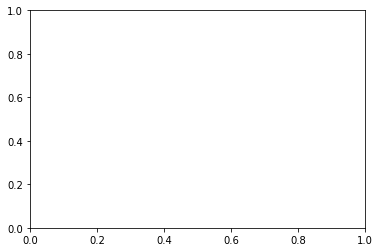

In [113]:
# Plots the Pixel File and lightcurve of each quarter for 6862328
for quarter in tpf_6862328:
    quarter.plot(scale='log')
    quarter.to_lightcurve().flatten().plot()


## These are fine, though

/Users/axloneal/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/axloneal/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/axloneal/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until

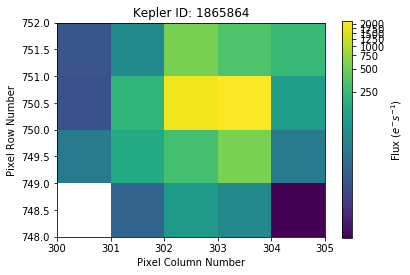

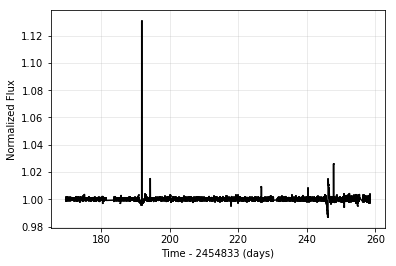

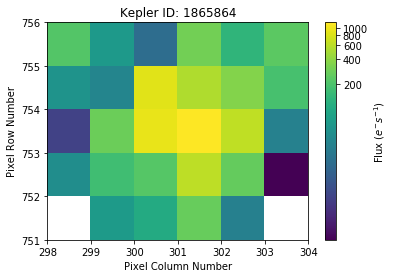

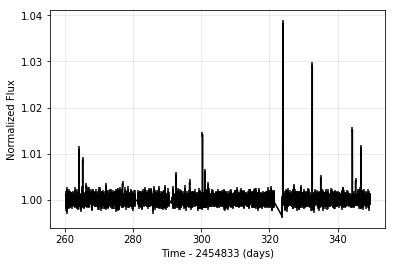

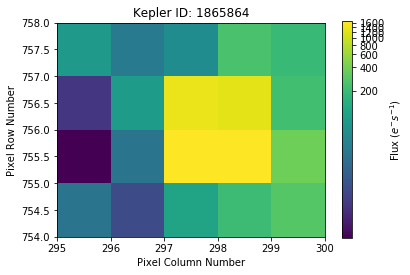

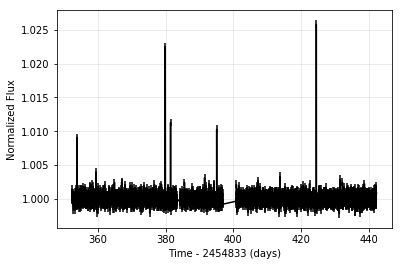

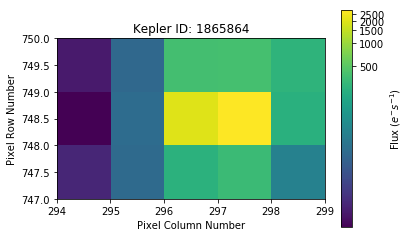

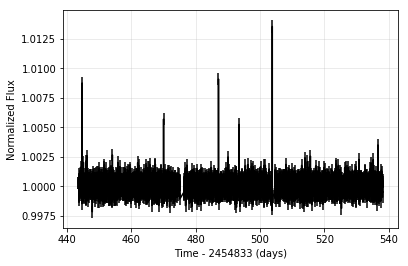

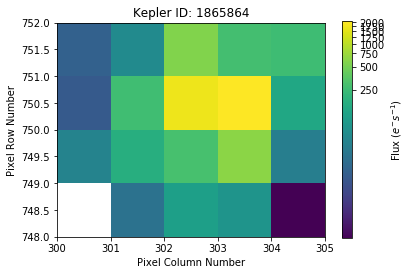

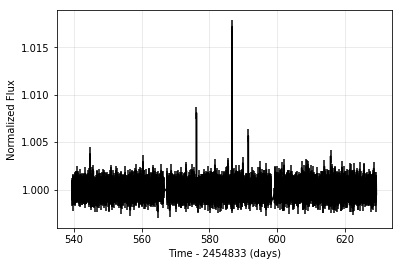

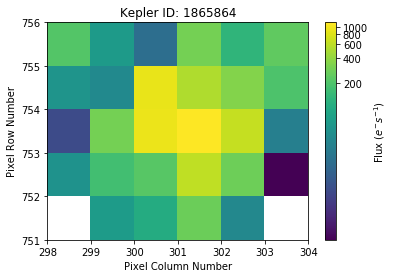

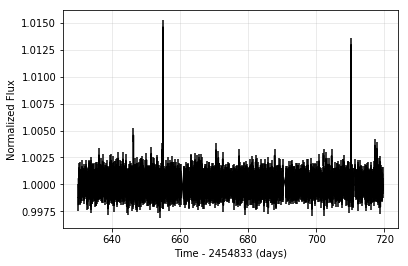

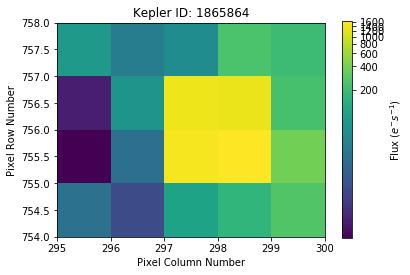

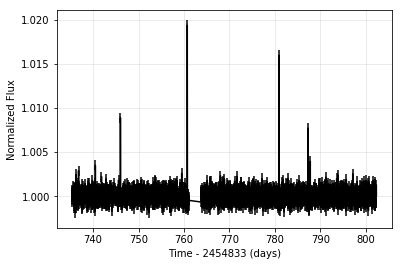

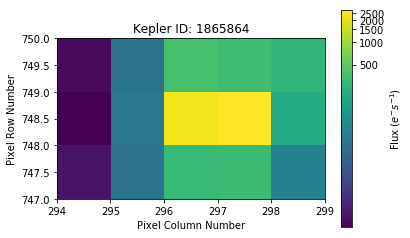

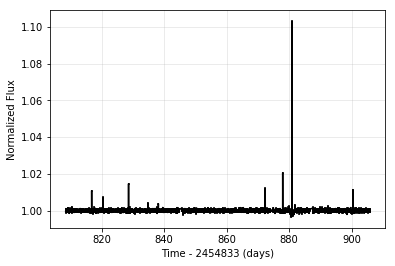

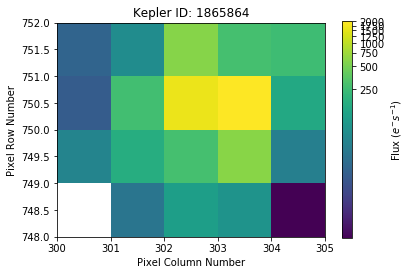

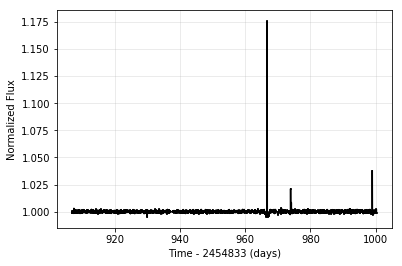

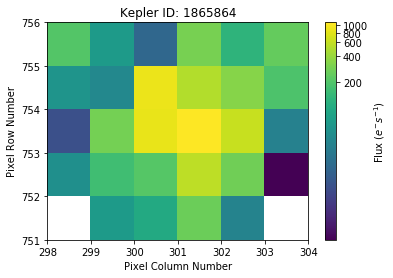

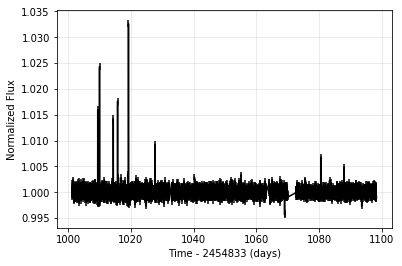

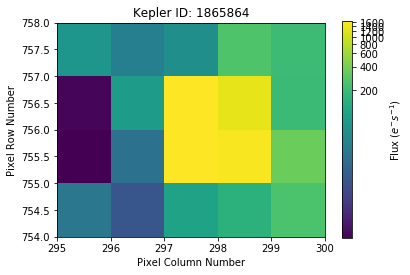

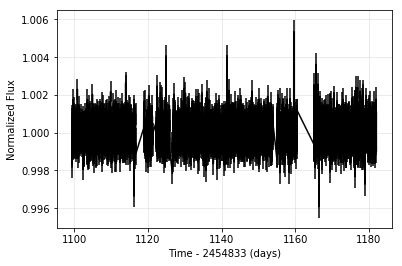

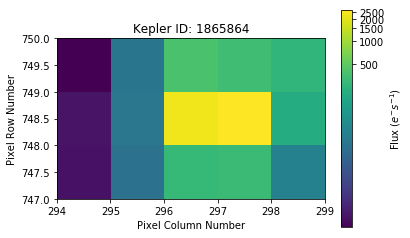

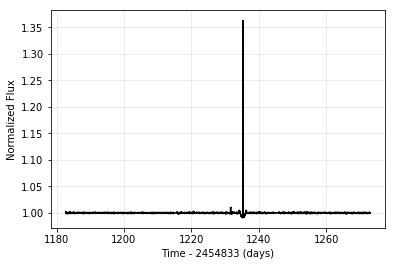

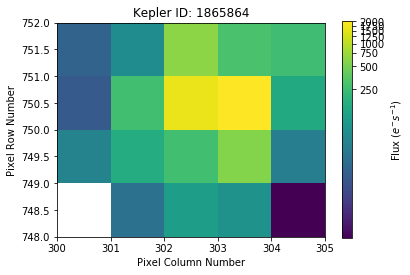

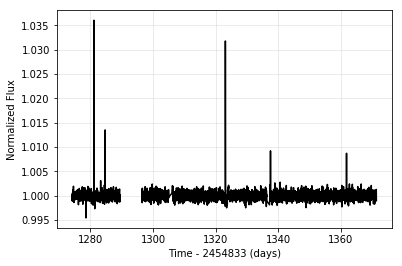

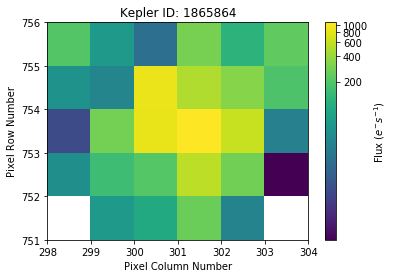

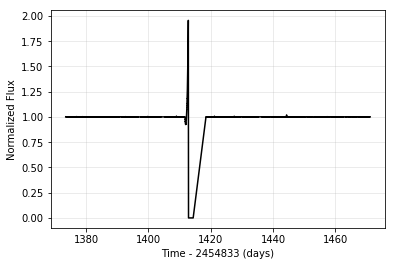

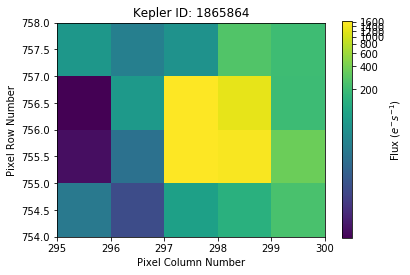

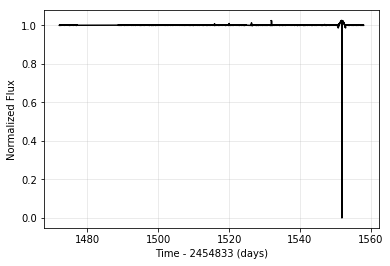

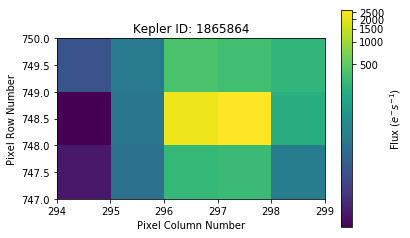

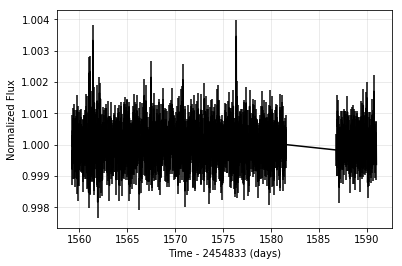

In [7]:
# Plots the Pixel File and lightcurve of each quarter for 1865864
for quarter in tpf_1865864:
    quarter.plot(scale='log')
    quarter.to_lightcurve().flatten().plot()

## IGNORE

In [19]:
# Universal variables to analyze separate quarters
QUARTER_686 = 12
QUARTER_186 = 7

In [84]:
# Variables for each quarter's lightcurve to find flux variation trend
lc_6862328_q = tpf_6862328[QUARTER_686 - 1].to_lightcurve(aperture_mask=tpf_6862328[QUARTER_686 - 1].pipeline_mask)
lc_6862328_q2 = tpf_6862328[1].to_lightcurve(aperture_mask=tpf_6862328[1].pipeline_mask)
lc_6862328_q3 = tpf_6862328[2].to_lightcurve(aperture_mask=tpf_6862328[2].pipeline_mask)

lc_6862328_q4 = tpf_6862328[3].to_lightcurve(aperture_mask=tpf_6862328[3].pipeline_mask)

lc_6862328_q5 = tpf_6862328[4].to_lightcurve(aperture_mask=tpf_6862328[4].pipeline_mask)
lc_6862328_q6 = tpf_6862328[5].to_lightcurve(aperture_mask=tpf_6862328[5].pipeline_mask)
lc_6862328_q7 = tpf_6862328[6].to_lightcurve(aperture_mask=tpf_6862328[6].pipeline_mask)
lc_6862328_q8 = tpf_6862328[7].to_lightcurve(aperture_mask=tpf_6862328[7].pipeline_mask)
lc_6862328_q9 = tpf_6862328[8].to_lightcurve(aperture_mask=tpf_6862328[8].pipeline_mask)
lc_6862328_q10 = tpf_6862328[9].to_lightcurve(aperture_mask=tpf_6862328[9].pipeline_mask)
lc_6862328_q11 = tpf_6862328[10].to_lightcurve(aperture_mask=tpf_6862328[10].pipeline_mask)
lc_6862328_q12 = tpf_6862328[11].to_lightcurve(aperture_mask=tpf_6862328[11].pipeline_mask)
lc_6862328_q13 = tpf_6862328[12].to_lightcurve(aperture_mask=tpf_6862328[12].pipeline_mask)
lc_6862328_q14 = tpf_6862328[13].to_lightcurve(aperture_mask=tpf_6862328[13].pipeline_mask)
lc_6862328_q15 = tpf_6862328[14].to_lightcurve(aperture_mask=tpf_6862328[14].pipeline_mask)
lc_6862328_q16 = tpf_6862328[15].to_lightcurve(aperture_mask=tpf_6862328[15].pipeline_mask)


flat,trend = lc_6862328_q.flatten(window_length=301, return_trend=True)


## IGNORE

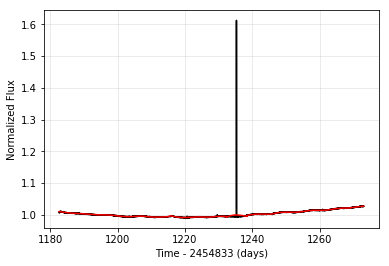

In [85]:
ax = lc_6862328_q.plot()
trend.plot(ax,color='red');

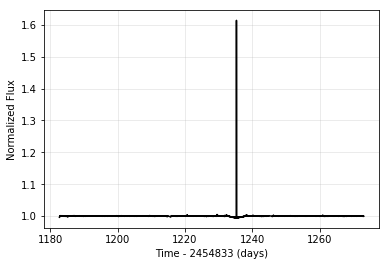

In [86]:
flat.plot()

In [11]:
from transit_periodogram import transit_periodogram

## IGNORE

In [12]:
periods = np.arange(0.3,1.5,0.0001)
durations = np.arange(0.005,0.15,0.001)
power, _, _, _, _, _, _ = transit_periodogram(time=flat4.time,
                                             flux=flat4.flux,
                                             flux_err=flat4.flux_err,
                                             periods=periods,
                                             durations=durations)
best_fit = periods[np.argmax(power)]

In [13]:
print('Best Fit Period: {} days'.format(best_fit))

Best Fit Period: 1.4794999999998701 days


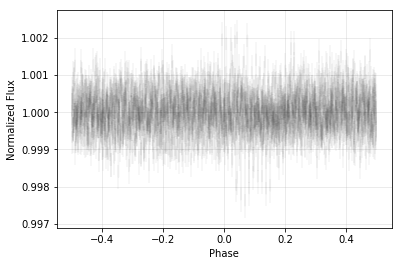

In [14]:
flat.fold(best_fit).plot(alpha=.04)

Combining lightcurves from different quarters

## IGNORE

In [56]:
%%capture
target = 6862328
lc_files_6862328 = KeplerLightCurveFile.from_archive(target,quarter=1).PDCSAP_FLUX.normalize().flatten(window_length=401)
for q in range(2,17):
    lc_files_6862328=lc_files_6862328.append(KeplerLightCurveFile.from_archive(target,quarter=q).PDCSAP_FLUX.normalize().flatten(window_length=401))

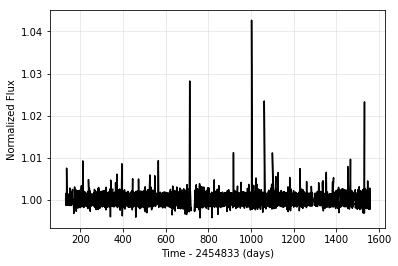

In [57]:
lc_files_1865864.plot()

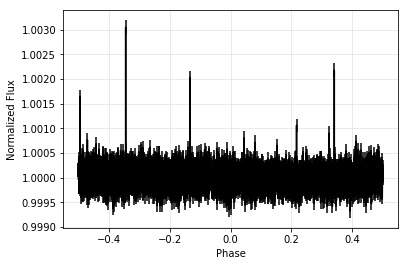

In [58]:
lc_files_1865864.fold(3.52254,phase=.038).bin().plot();

## Removing common systematic errors

## IGNORE

Found 1 File(s)
INFO: Found cached file ./mastDownload/Kepler/kplr006862332_lc_Q001111111111111111/kplr006862332-2010265121752_llc.fits with expected size 469440. [astroquery.query]


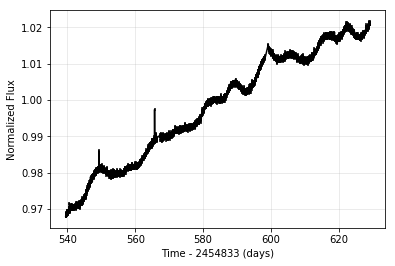

In [26]:

lcf_6862328 = KeplerLightCurveFile.from_archive(6862328,quarter=QUARTER_686)
lc_686 = lcf_6862328.SAP_FLUX

lc_686 = lc_686.remove_nans()

lc_686.plot(linestyle='-');

## Trends in each quarter - 6862328
## IGNORE!!! NOT 6862328 DATA

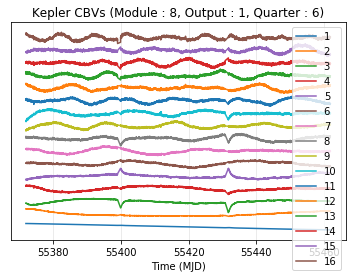

In [25]:

KeplerCBVCorrector(lcf_6862328).plot_cbvs([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]);

In [29]:
corr_lc = KeplerCBVCorrector(lcf_6862328).correct(cbvs=[10,11,12,13,14,15,16])

Corrected for heat errors

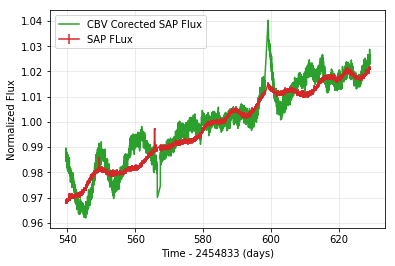

In [32]:
ax = lc_686.plot(color='C3', label='SAP FLux', linestyle='-')
corr_lc.plot(ax=ax, color='C2', label='CBV Corected SAP Flux', linestyle='-');

## Here on out should be fine

Found 1 File(s)
INFO: Found cached file ./mastDownload/Kepler/kplr001865864_lc_Q001111111111111111/kplr001865864-2010355172524_llc.fits with expected size 466560. [astroquery.query]


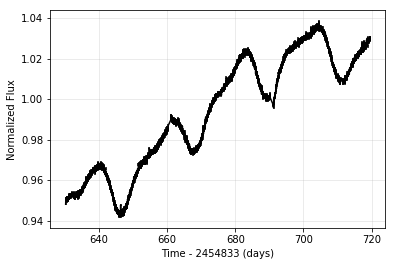

In [20]:
lcf_1865864 = KeplerLightCurveFile.from_archive(1865864,quarter=QUARTER_186)
lc_186 = lcf_1865864.SAP_FLUX

lc_186 = lc_186.remove_nans()

lc_186.plot(linestyle='-');

## Trends in each quarter - 1865864

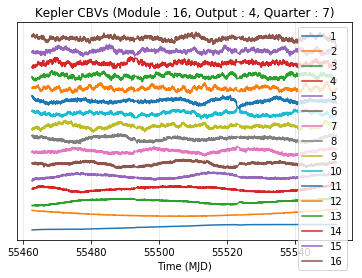

In [21]:
plt.figure(figsize=(10,5))
KeplerCBVCorrector(lcf_1865864).plot_cbvs([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]);

In [22]:
corr_lc_186 = KeplerCBVCorrector(lcf_1865864).correct(cbvs=[8,7,6,5,4])

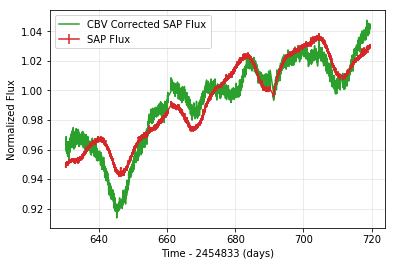

In [23]:
ax = lc_186.plot(color='C3', label='SAP Flux', linestyle='-')
corr_lc_186.plot(ax=ax, color='C2', label='CBV Corrected SAP Flux', linestyle='-')

## Removing motion systematic errors